# Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
from sympy import symbols, diff
from matplotlib import cm

# Functions and Calculations

In [12]:
#Global variables
x_path = 0
loss_path = []
loss_fn_min = 0
x_at_min = 0
n_iter = 0
grad = 0


class gd_cw_2d:
    def __init__(self, fn_loss, fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad


    # Our function that we will be using for our gradient descent model with momentum
    def momentum(self, x1_init, x2_init, n_iter, eta, tol, alpha):
        self.n_iter = n_iter
        self.eta = eta
        self.tol = tol
        self.alpha = alpha
        x = [x1_init,x2_init]
        
        loss_path = []
        x_path = np.zeros([n_iter+1,2])
        
        x_path[0,:] = x
        loss_this = self.fn_loss(x[0],x[1])
        loss_path.append(loss_this)
        g = self.fn_grad(x[0],x[1])
        g_mag= sum(np.square(x))

        nu1 = 0

        for i in range(n_iter):
            g = self.fn_grad(x[0],x[1])
            g_mag = sum(np.square(x))
            #if g_mag<tol:
            if np.all(np.abs(g)) < tol: #or np.isnan(g):
                break
            
            # Calculations needed for vt = beta*vt + (1-beta)*g
            # and x += -eta*vt
            
            nu1 = alpha * nu1 + eta * g
            x += -nu1
            
            x_path[i+1,:] = x
            loss_this = self.fn_loss(x[0],x[1])
            loss_path.append(loss_this)

        
        self.loss_path = loss_path
        self.x_path = x_path[0:i+1]
        self.loss_fn_min = loss_this
        self.x_at_min = x
        
    # Our function that we will be using for our gradient descent model for Plain Vanilla/Batch gradient descent
    def vanilla(self, x1_init, x2_init, n_iter, eta, tol):
        self.n_iter = n_iter
        self.eta = eta
        self.tol = tol
        x = [x1_init,x2_init]
        
        loss_path = []
        x_path = np.zeros([n_iter+1,2])
        
        x_path[0,:] = x
        loss_this = self.fn_loss(x[0],x[1])
        loss_path.append(loss_this)
        
        g = self.fn_grad(x[0],x[1])
        g_mag = sum(np.square(x))
        grad = []
        for i in range(n_iter):
            
            
            if np.all(np.abs(g)) < tol: #or np.isnan(float(g[0][i])) or np.isnan(float(g[i][0])):
                break
            grad.append(g)
            #print(g)
            g = self.fn_grad(x[0],x[1])
            g_mag = sum(np.square(x))
            x += -eta*g
            x_path[i+1,:] = x
            
            loss_this = self.fn_loss(x[0],x[1])
            loss_path.append(loss_this)
            
        self.x_at_min = x
        self.n_iter = i
        self.grad = grad
        self.loss_fn_min = loss_this
        self.x_path = x_path[0:i+1]
        self.loss_path = loss_path
    

    # Our function that we will be using for our gradient descent model for Nesterov
    def nag(self, x1_init, x2_init, n_iter, eta, tol, alpha):
        self.n_iter = n_iter
        self.eta = eta
        self.tol = tol
        self.alpha = alpha
        x = [x1_init,x2_init]

        loss_path = []
        x_path = np.zeros([n_iter+1,2])

        x_path[0,:] = x
        loss_this = self.fn_loss(x[0],x[1])
        loss_path.append(loss_this)
        g = self.fn_grad(x[0],x[1])
        g_mag= sum(np.square(x))

        nu1 = np.array([0,0])
        for i in range(n_iter):
            # i starts from 0 so make sure to +1
            
            # The formula added via Nesterovs suggestion
            mu = 1 - 3 / (i + 1 + 5) 
            g = self.fn_grad(x[0]-mu*nu1[0],x[1]-mu*nu1[1])
            
            if np.all(np.abs(g)) < tol: #or np.any(np.isnan(g)):
                break
            
            nu1 = alpha * nu1 + eta * g
            x += -nu1
            
            x_path[i+1,:] = x
            loss_this = self.fn_loss(x[0],x[1])
            loss_path.append(loss_this)
            

        self.loss_path = loss_path
        self.x_path = x_path[0:i+1]
        self.loss_fn_min = loss_this
        self.x_at_min = x

        
# Creating a loss function for our three models - NAG, Momentum + Vanilla
def fn_loss(x,y):
    loss = (x+2*y-7)**2 + (2*x+y-5)**2
    
    #all loss cost calculations used for this function
    #loss1 = math.exp(-(x**2+y**2))
    #loss2 = 4 + x**3 + y**3 - 3*x*y
    #loss3 = 3*x**2*y + y**3 - 3*x**2 - 3*y**2 +2
    #loss4 = (1.5-x+x*y)**2 + (2.25-x+x*y**2)**2 + (2.625-x+x*y**3)**2
    
    return loss

# The function that will be calculating our gradient
def fn_grad(x0,y0):
    x,y = symbols('x y',real=True)
    loss = (x+2*y-7)**2 + (2*x+y-5)**2
    d1 = diff(loss,x)
    d2 = diff(loss,y)
    grad1 = d1.evalf(subs={x: x0,y: y0})
    grad2 = d2.evalf(subs={x: x0,y: y0})
    g = np.array([grad1,grad2])
    return g

#The function pathway for the gradient descent
#The function for plotting loss to display findings
def plot(path):
    ax = plt.axes(projection='3d')

    #a = np.array(range(-4,5))
    x = np.linspace(-15,15)
    y = np.linspace(-15,15)

    X, Y = np.meshgrid(x,y)

    #zs = np.array(fn_loss(np.ravel(X), np.ravel(Y)))
    #Z = zs.reshape(X.shape)
    Z = fn_loss(X,Y)

    ax.plot_surface(X, Y, Z, alpha=0.7)

    x1 = path[:,0]
    y1 = path[:,1]
    z1 = fn_loss(x1,y1)

    ax.scatter(x1,y1,z1,c='black')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
    plt.savefig('vanilla.png')

In [4]:
# Using solver to initalise our classes
solver = gd_cw_2d(fn_loss=fn_loss, fn_grad=fn_grad)

# Plot 1 - Momentum

Momentum: The point which generates the minimum is:  [1. 3.]


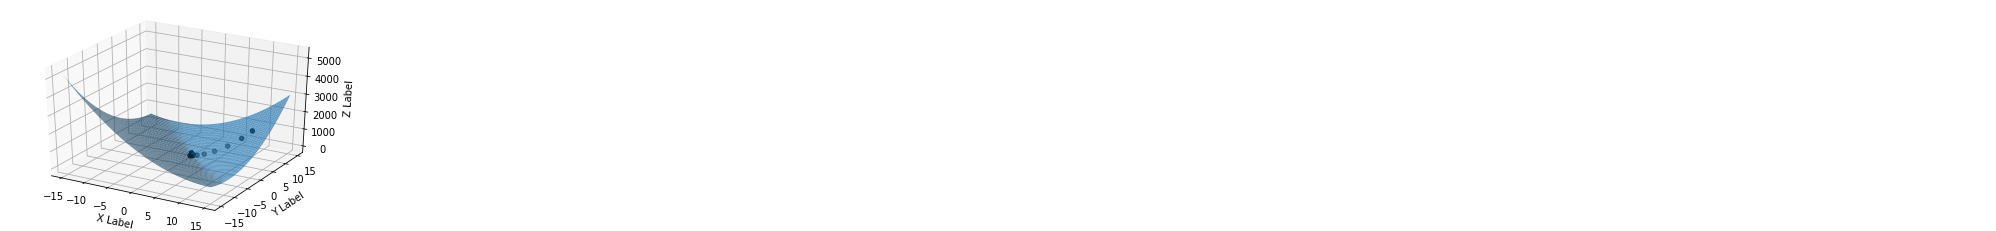

<Figure size 432x288 with 0 Axes>

In [10]:
# The plot for gradient descent with momentum
# + input parameters

solver.momentum(x1_init = 10, x2_init = 10, n_iter = 1000,
                eta = 0.01, tol = 1e-14, alpha = .5)
momentum_path = solver.x_path
momentum_min = solver.x_at_min.astype(np.double)
momentum_loss = solver.loss_path

print('Momentum: The point which generates the minimum is: ', momentum_min)
plot(momentum_path)


## Plot 2 - NAG

NAG: The point which generates the minimum is:  [1. 3.]


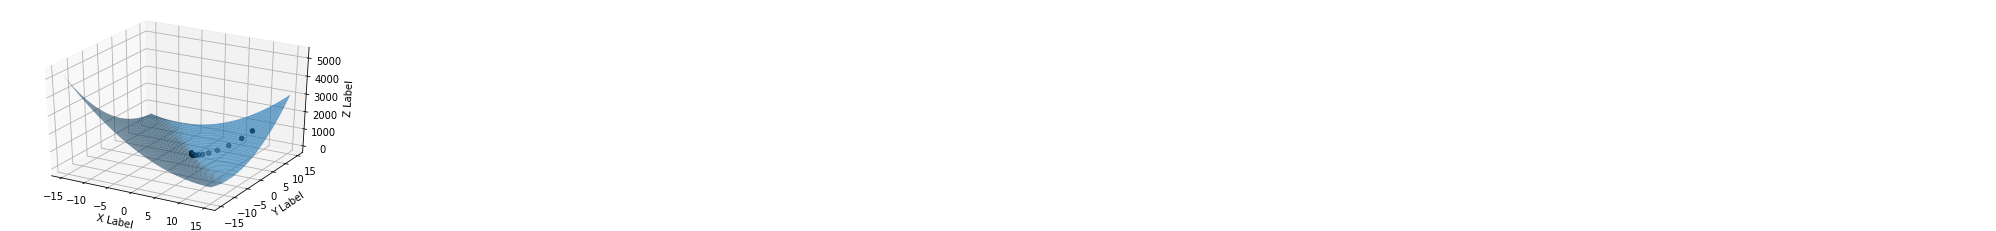

In [6]:
# gradient descent with nesterov 
# + input parameters

solver.nag(x1_init = 10, x2_init = 10, n_iter = 1000,
           eta = 0.01, tol = 1e-14, alpha = .5)
nag_path = solver.x_path
nag_min = solver.x_at_min.astype(np.double)
nag_loss = solver.loss_path

print('NAG: The point which generates the minimum is: ', nag_min)
plot(nag_path)

## Plot 3 - Vanilla 

Vanilla: The point which generates the minimum is:  [1. 3.]


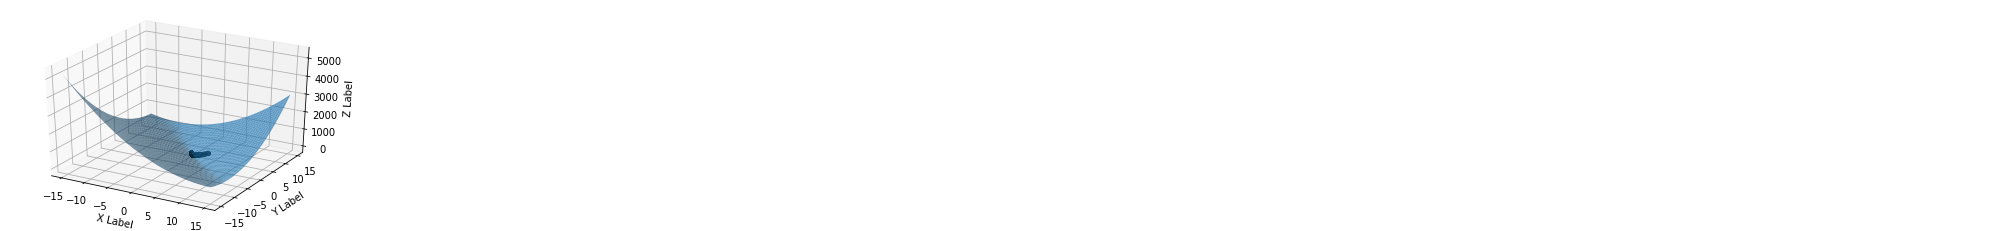

<Figure size 432x288 with 0 Axes>

In [13]:
# plain vanilla gradient descent
# + input parameters 

solver.vanilla(x1_init = 4, x2_init = 4, n_iter = 1000,
               eta = 0.01, tol = 1e-14)
vanilla_path = solver.x_path
vanilla_loss = solver.loss_path
vanilla_min = solver.x_at_min.astype(np.double)

grad = solver.grad

print('Vanilla: The point which generates the minimum is: ', vanilla_min)
plot(vanilla_path)

   